## Based on a YouTube tutorial by John McKay (@mckayjohns)

In [ ]:
pip install soccerplots

In [24]:
#import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [25]:
df = pd.read_csv('manager nos como - Sheet2.csv') #read the file, this is tabulated by me via FBRef. You can take any data

In [26]:
df.head(15)

,Teams,Goals per 90,xG per 90,Shots per 90,Middle Third Touches per 90,Touches in Opp. Box per 90,PPDA,High turnovers per game,Through balls conceded per 90,Passes allowed in own box per 90,Shots Conceded per 90,Goals conceded per 90,xG Conceded per 90
0,Liverpool - 23/24,2.10,2.17,18.48,350.5,33.0,9.2,9.61,1.48,6.52,11.24,0.81,1.14
1,Bayer Leverkusen - 23/24,2.53,2.75,17.53,435.6,35.1,13.2,10.94,1.37,5.42,8.68,0.74,0.94
2,Sporting CP - 23/24,2.68,2.19,16.79,344.3,33.3,10.7,9.57,1.79,4.47,7.79,1.00,0.79
3,Brighton - 23/24,1.64,1.67,14.73,360.4,30.1,10.6,9.31,1.32,7.59,12.14,1.59,1.55


In [47]:
#filter with team for comparison later
dfls = df[(df['Teams'] == 'Bayer Leverkusen - 23/24') | (df['Teams'] == 'Liverpool - 23/24')].reset_index()

In [48]:
dfls = dfls.drop(['index'], axis = 1) 

In [49]:
#change column names for better radar visualisation
new_column_names = {
    'Teams': 'Team',
    'Goals per 90': 'Goals',
    'xG per 90': 'xG',
    'Shots per 90': 'Sh/90',
    'Middle Third Touches per 90': 'Middle third touches',
    'Touches in Opp. Box per 90': 'Opp. box touches',
    'PPDA': 'PPDA',
    'High turnovers per game': 'High turnovers',
    'Through balls conceded per 90': 'Through balls conc',
    'Passes allowed in own box per 90': 'Passes conc(own box)',
    'Shots Conceded per 90': 'Shots conceded',
    'Goals conceded per 90': 'Goals conceded',
    'xG Conceded per 90': 'xG conceded'
}

dfls = dfls.rename(columns=new_column_names)


In [50]:
dfls

,Team,Goals,xG,Sh/90,Middle third touches,Opp. box touches,PPDA,High turnovers,Through balls conc,Passes conc(own box),Shots conceded,Goals conceded,xG conceded
0,Liverpool - 23/24,2.10,2.17,18.48,350.5,33.0,9.2,9.61,1.48,6.52,11.24,0.81,1.14
1,Bayer Leverkusen - 23/24,2.53,2.75,17.53,435.6,35.1,13.2,10.94,1.37,5.42,8.68,0.74,0.94


In [57]:
#get parameters

params = list(dfls.columns)
params = params[1:]
params

['Goals',
 'xG',
 'Sh/90',
 'Middle third touches',
 'Opp. box touches',
 'PPDA',
 'High turnovers',
 'Through balls conc',
 'Passes conc(own box)',
 'Shots conceded',
 'Goals conceded',
 'xG conceded']

In [58]:
#create radar ranges 

ranges = []
a_values = []
b_values = []
for x in range (len(dfls['Team'])):
    if dfls['Team'][x] == 'Bayer Leverkusen - 23/24': 
        a_values = dfls.iloc[x].values.tolist()
    if dfls['Team'][x] == 'Liverpool - 23/24':
        b_values = dfls.iloc[x].values.tolist()
    
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values, b_values]

In [59]:
# Reverse the ranges for defensive metrics
for i, x in enumerate(params):
    if 'conceded' in x.lower() or 'conc' in x.lower() or 'PPDA' in x.lower():
        a = max(dfls[params][x])  # Max value indicates worse performance
        a = a + (a * 0.20)  # Add 20% for better visualization
        b = min(dfls[params][x])  # Min value indicates better performance
        b = b - (b * 0.20)  # Subtract 20% for better visualization
    else:
        a = min(dfls[params][x])  # Min value indicates better performance
        a = a - (a * 0.20)  # Subtract 20% for better visualization
        b = max(dfls[params][x])  # Max value indicates worse performance
        b = b + (b * 0.20)  # Add 20% for better visualization
    
    ranges.append((a, b))


In [60]:
values

[[2.53, 2.75, 17.53, 435.6, 35.1, 13.2, 10.94, 1.37, 5.42, 8.68, 0.74, 0.94],
 [2.1, 2.17, 18.48, 350.5, 33.0, 9.2, 9.61, 1.48, 6.52, 11.24, 0.81, 1.14]]

In [61]:
#title 

title = dict(
    title_name = 'Bayer Leverkusen - 23/24',
    title_color = 'cyan',
    subtitle_name = 'Xabi Alonso',
    subtitle_color = 'cyan',
    
    title_name_2 = 'Liverpool - 23/24',
    title_color_2 = 'red',
    subtitle_name_2 = 'Jurgen Klopp',
    subtitle_color_2 = 'red',
    
    title_fontsize = 18,
    subtitle_fontsize = 14
 
)

endnote = 'All Numbers per 90\nVisual by - Mizgan, @mizgans \ndata via FBRef/Opta\n conc = conceded'

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

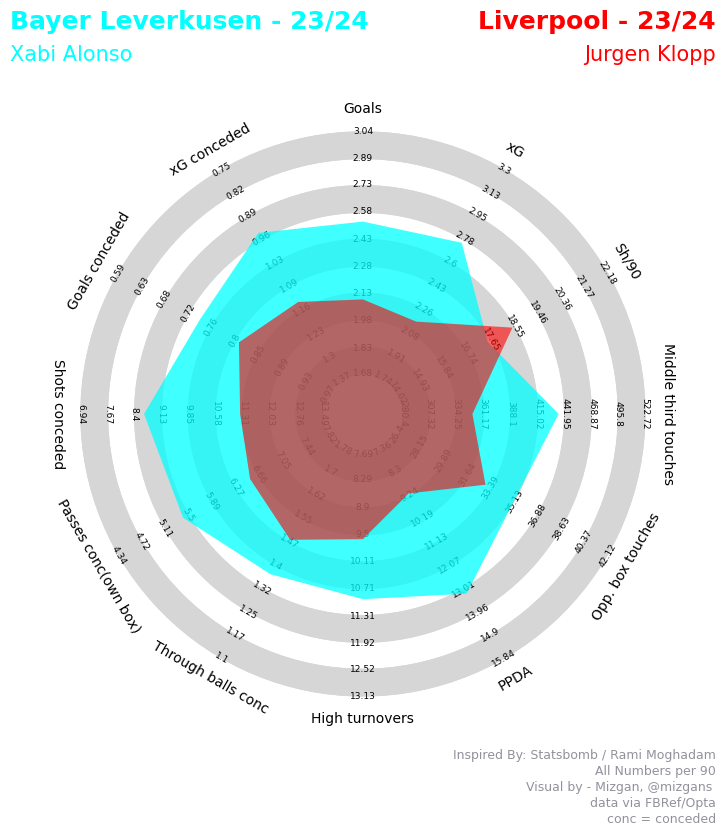

In [62]:
#plot radar
radar = Radar()

fig,ax = radar.plot_radar(ranges = ranges, params = params, values = values,
                          radar_color = ['cyan', 'red'], alphas = [0.75, 0.6], title = title, endnote = endnote,
                         compare = True)